In [125]:
!pip install nltk textblob

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from textblob import TextBlob


In [127]:

import warnings
warnings.filterwarnings("ignore")

In [128]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [129]:
from google.colab import files
uploaded = files.upload()

Saving blogs.csv to blogs (2).csv


In [130]:
df = pd.read_csv("blogs.csv")
df.head()

,Data,Labels,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
df.shape

(93822, 37)

In [132]:
def clean_text(text):
    text = str(text).lower()                           # lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text) # remove urls
    text = re.sub(r'[^a-z\s]', '', text)               # remove punctuation/numbers
    text = " ".join([word for word in text.split() if word not in stop_words]) # remove stopwords
    return text

In [133]:
df['Clean_Data'] = df['Data'].apply(clean_text)

In [134]:
df

,Data,Labels,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Clean_Data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,xref cantaloupesrvcscmuedu altatheism talkreli...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93817,And make her infamous in story.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,make infamous story
93818,When such a tempest shook the land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tempest shook land
93819,"How could unguarded virtue stand ?""""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,could unguarded virtue stand
93820,- Jonathan Swift (1732),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jonathan swift


In [135]:
print("\nSample cleaned text:")


Sample cleaned text:


In [136]:
print(df['Clean_Data'].head())


0    path cantaloupesrvcscmuedumagnesiumclubcccmued...
1    newsgroups altatheism path cantaloupesrvcscmue...
2    path cantaloupesrvcscmuedudasnewsharvardedunoc...
3    path cantaloupesrvcscmuedumagnesiumclubcccmued...
4    xref cantaloupesrvcscmuedu altatheism talkreli...
Name: Clean_Data, dtype: object


In [137]:
tfidf = TfidfVectorizer(max_features=5000)

In [138]:
tfidf

TfidfVectorizer(max_features=5000)

In [139]:
# Remove rows with NaN values in the 'Labels' column
df.dropna(subset=['Labels'], inplace=True)

X = tfidf.fit_transform(df['Clean_Data']).toarray()
y = df['Labels']

In [140]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [141]:
print("Feature matrix shape:", X.shape)

Feature matrix shape: (20518, 5000)


In [142]:
X = tfidf.fit_transform(df_filtered['Clean_Data']).toarray()
y = df_filtered['Labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [143]:
label_counts = df['Labels'].value_counts()

In [144]:
label_counts

,count
Labels,
,165
alt.atheism,117
and,89
Inc.,79
talk.politics.misc,61
...,...
Stankiewicz,1
and his,1
or over the last 5 years,1


In [145]:
labels_to_keep = label_counts[label_counts >= 5].index

In [146]:
labels_to_keep

Index([' ', 'alt.atheism', ' and', ' Inc.', 'talk.politics.misc', ' but',
       ' however', 'comp.graphics', ' the', 'talk.religion.misc',
       ...
       ' Melbourne', ' however.', 'soc.men', ' University of Maryland',
       ' Greenbelt', 'comp.sys.mac.system', ' Pittsburgh', ' Uxbridge',
       ' wpr@atlanta.dg.com (Bill Rawlins) writes:', '1990'],
      dtype='object', name='Labels', length=145)

In [147]:
df.dropna(subset=['Labels'], inplace=True)

In [148]:
df_filtered = df[df['Labels'].isin(labels_to_keep)].copy()

In [149]:
df_filtered

,Data,Labels,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Clean_Data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,xref cantaloupesrvcscmuedu altatheism talkreli...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93603,John Mechalas ...,but,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,john mechalas im actor
93619,In article <1993Apr21.225146.20804@rambo.atlan...,wpr@atlanta.dg.com (Bill Rawlins) writes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,article aprramboatlantadgcom
93725,Newsgroups: sci.skeptic,talk.politics.misc,talk.religion.misc,misc.legal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,newsgroups sciskeptic
93731,Followup-To: sci.skeptic,talk.politics.misc,talk.religion.misc,misc.legal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,followupto sciskeptic


In [150]:
X = tfidf.fit_transform(df_filtered['Clean_Data']).toarray()
y = df_filtered['Labels']

In [151]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [152]:
print("Training size:", X_train.shape[0], " | Test size:", X_test.shape[0])

Training size: 1517  | Test size: 380


In [153]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [154]:

model

MultinomialNB()

In [155]:
y_pred = model.predict(X_test)

In [156]:
y_pred

array(['alt.atheism', 'alt.atheism', ' ', ' ', 'talk.politics.misc',
       'alt.atheism', ' ', ' ', ' ', ' ', 'alt.atheism', ' ',
       'alt.atheism', 'talk.religion.misc', 'alt.atheism', 'alt.atheism',
       'alt.atheism', ' ', 'alt.atheism', 'alt.atheism', ' ', ' ', ' ',
       ' Boulder', ' Inc.', 'alt.atheism', ' ', 'alt.atheism',
       'alt.atheism', ' ', ' Inc.', 'talk.politics.misc', ' ',
       ' Number 11                                           April 25',
       'alt.atheism', ' ', ' ', ' ', ' ', 'alt.atheism',
       'talk.politics.misc', ' ', ' ', ' ', 'talk.politics.misc', ' Inc.',
       'alt.atheism', 'rec.autos.tech', ' Inc.', ' ', ' ', ' ', ' ',
       ' Inc.', 'talk.politics.misc', 'talk.politics.misc', ' ', ' ', ' ',
       ' ', ' ', ' ', ' and', ' ', ' Inc.', ' ', ' ', ' ', 'alt.atheism',
       ' Inc.', ' ', ' ', 'alt.atheism', ' ', ' ', 'talk.politics.misc',
       ' ', ' ', 'alt.atheism', 'talk.politics.misc', 'alt.atheism', ' ',
       'alt.atheism', ' ', '

In [157]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
                                                                precision    recall  f1-score   support

                                                                    0.16      0.88      0.27        33
                                                                    0.00      0.00      0.00         1
                                             by Evelyn Conlon       0.00      0.00      0.00         1
                                                     ""Karina       0.00      0.00      0.00         1
                                                         ""No       0.00      0.00      0.00         1
                                                       Athens       0.00      0.00      0.00         1
                                              Atlanta Georgia       0.00      0.00      0.00         1
                                                      Bedford       0.00      0.00      0.00         1
                                               

In [158]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.28157894736842104


In [159]:
print("Precision:", precision_score(y_test, y_pred, average='weighted'))

Precision: 0.19153527447530896


In [160]:
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

Recall: 0.28157894736842104


In [161]:
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

F1 Score: 0.1811401326699834


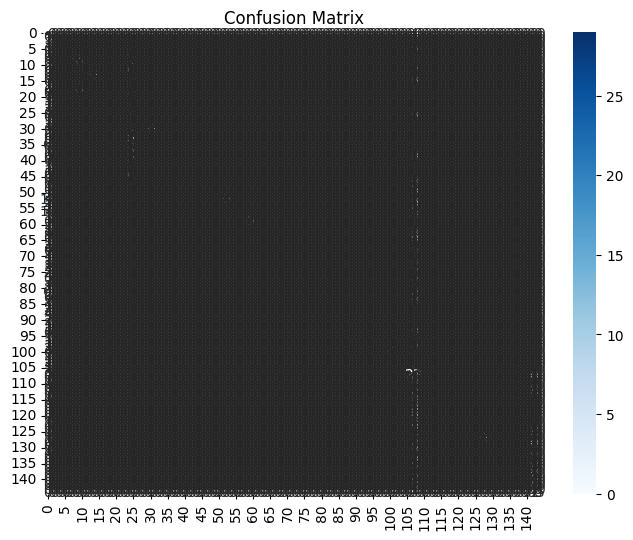

In [162]:
# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [163]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

In [164]:
df['Sentiment'] = df['Data'].apply(get_sentiment)

In [165]:
df

,Data,Labels,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Clean_Data,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,path cantaloupesrvcscmuedumagnesiumclubcccmued...,Positive
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,newsgroups altatheism path cantaloupesrvcscmue...,Negative
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,path cantaloupesrvcscmuedudasnewsharvardedunoc...,Positive
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,path cantaloupesrvcscmuedumagnesiumclubcccmued...,Positive
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,xref cantaloupesrvcscmuedu altatheism talkreli...,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93808,When up a dangerous faction starts,"""""My opinions do not represent",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dangerous faction starts,Negative
93810,By solemn League and Cov'nant bound,"any government agency.""""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,solemn league covnant bound,Neutral
93811,To ruin,slaughter,and confound; - Bill Riggs (1992),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ruin,Neutral
93814,Pervert the law,disgrace the gown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pervert law,Neutral


In [166]:
print("\nSentiment Distribution:")


Sentiment Distribution:


In [167]:
print(df['Sentiment'].value_counts())

Sentiment
Neutral     16286
Positive     2564
Negative     1668
Name: count, dtype: int64


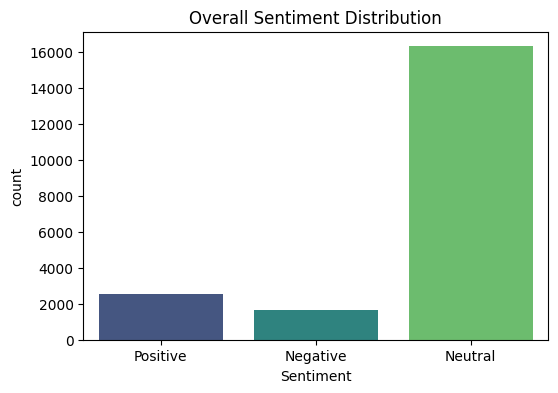

In [168]:
# Visualization
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title("Overall Sentiment Distribution")
plt.show()

In [169]:
sentiment_by_category = pd.crosstab(df['Labels'], df['Sentiment'])

In [170]:
sentiment_by_category

Sentiment,Negative,Neutral,Positive
Labels,,,
\t\t\t\t\t\t\t *,0,1,0
\t\t8,0,1,0
\t | Raffles Hall,0,1,0
\tXmATTACH_FORM,0,2,0
,24,97,44
...,...,...,...
y positions are known.,0,0,1
y) (other points,0,1,0
y) (the known true values),0,1,0


In [171]:
print("\nSentiment by Category:\n", sentiment_by_category)


Sentiment by Category:
 Sentiment                        Negative  Neutral  Positive
Labels                                                      
\t\t\t\t\t\t\t      *                   0        1         0
\t\t8                                   0        1         0
\t               | Raffles Hall         0        1         0
\tXmATTACH_FORM                         0        2         0
                                       24       97        44
...                                   ...      ...       ...
y positions are known.                  0        0         1
y) (other points                        0        1         0
y) (the known true values)              0        1         0
y) (the same points                     0        1         0
|| UUNET:uunet!bcr!fist                 0        3         0

[17371 rows x 3 columns]


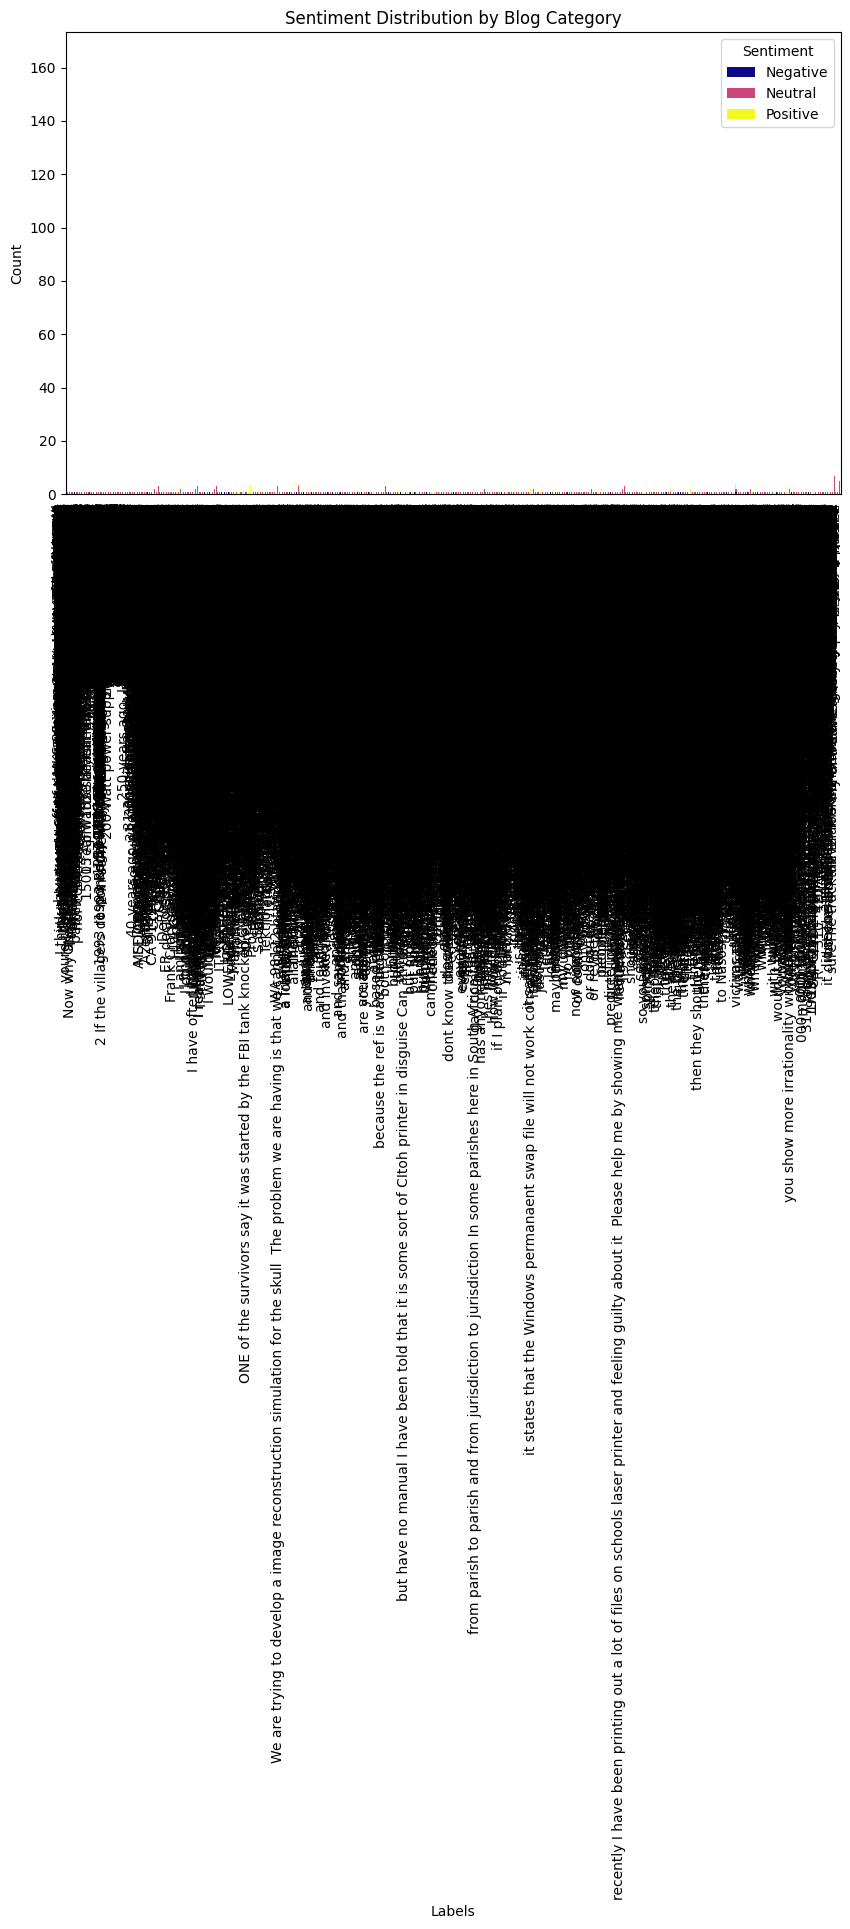

In [172]:
# Clean up labels for plotting
sentiment_by_category.index = sentiment_by_category.index.str.strip()
sentiment_by_category.index = sentiment_by_category.index.str.replace(r'[^\w\s]', '', regex=True) # Remove non-alphanumeric characters except spaces

sentiment_by_category.plot(kind="bar", stacked=True, figsize=(10,6), colormap="plasma")
plt.title("Sentiment Distribution by Blog Category")
plt.ylabel("Count")
plt.xticks(rotation=90, ha='right') # Rotate labels for better readability
plt.gca().tick_params(axis='x', which='both', bottom=False, top=False) # Hide tick marks
plt.gca().set_xticklabels(sentiment_by_category.index)
plt.show()

In [123]:
sentiment_by_category.index

Index(['', '8', ' Raffles Hall', 'XmATTACH_FORM', '', '', '', '', '', '',
       ...
       'very strict\t\t\t', 'well', 'wiforsale', 'without knowing ANYTHING',
       'y and saves those values when you click', 'y positions are known',
       'y other points', 'y the known true values', 'y the same points',
       ' UUNETuunetbcrfist'],
      dtype='object', name='Labels', length=17371)

In [124]:
sentiment_by_category.plot